In [1]:
import time
import json
import requests

import numpy  as np
import pandas as pd

from PIL import Image
from io  import BytesIO

In [2]:
time_type = {
    'a1': '10点前',
    'n1': '10~12点',
    'n2': '12~14点',
    'p1': '14点后'
}

In [3]:
SkiRanch_ID   = '57a0ff6a-8619-4a78-976b-58a0b971ba66' # 崇礼 万龙度假天堂
DailyPhotoAPI = 'https://api.fenxuekeji.com/api/pw/photo_walls/%s/daily'

date_string = '2019-03-31'
apn = 'n1'

In [4]:
params = {'apn': apn, 'datestring': date_string, 'device': 'pc', 'page': 1}

meta_data = requests.get(DailyPhotoAPI %SkiRanch_ID, params).json()['data']

total_pages = meta_data['total_pages']

In [5]:
# Init.
urls = pd.Series()
# Save 1st page
urls = urls.append(pd.DataFrame(dict(pd.DataFrame(meta_data['photos'])['image'])).loc['x1000'])

# Retrieve pages
for page_idx in np.arange(2,total_pages):
    # Set parameters
    params = {'apn': apn, 'datestring': date_string, 'device': 'pc', 'page': page_idx}
    # Get metadata
    meta_data = requests.get(DailyPhotoAPI %SkiRanch_ID, params).json()['data']
    # Save urls
    urls = urls.append(pd.DataFrame(dict(pd.DataFrame(meta_data['photos'])['image'])).loc['x1000'])
    # Pause to avoid getting banned
    time.sleep(np.random.choice(np.arange(1,10)))

# Save urls
urls = urls.reset_index()[0]
urls.to_pickle('pw_20190331_wl_n1.pkl')

In [6]:
image = Image.open(BytesIO(requests.get(np.random.choice(urls)).content))

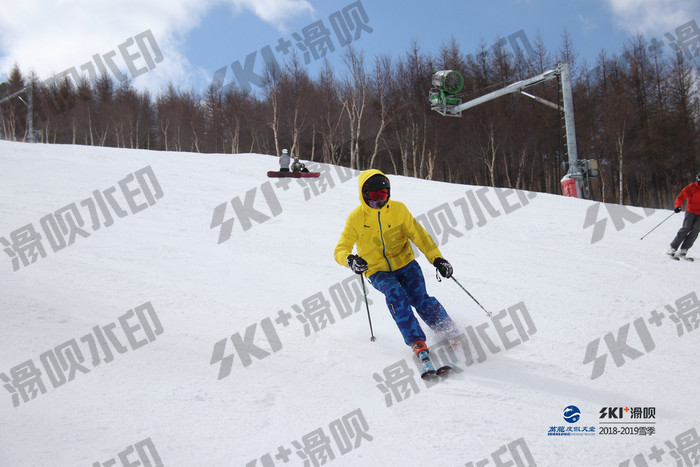

In [7]:
image